In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score

Classification Algorithm --

Naive Bayes
KNN algo
Decision Tree
Random Forest


In [2]:
dataset =  pd.read_csv("C:\\Users\\Bharat\\OneDrive\\Desktop\\notwinter\\PROJECTS\\CREDIT_CARD FRAUD DETECTION\\DATASET\\creditcard_2023.csv")

In [3]:
dataset.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [5]:
dataset.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [6]:
dataset.isnull().sum().sum() # 0 Missing data

0

In [7]:
dataset.info() # No categorical data -> No encoding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [8]:
dataset.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [9]:
dummy = dataset['V1']==1
dummy

(dataset['V1']==1)==False

0         True
1         True
2         True
3         True
4         True
          ... 
568625    True
568626    True
568627    True
568628    True
568629    True
Name: V1, Length: 568630, dtype: bool

In [10]:
def treat_outlair(_outlair_feature,dataset):
    sns.boxplot(y=_outlair_feature,data=dataset)
    plt.show()

    Q1 = dataset[_outlair_feature].quantile(0.25)
    Q3 = dataset[_outlair_feature].quantile(0.75)

    IQR = Q3-Q1

    _outlair_TV_POS = Q3 + 1.5*IQR
    _outlair_TV_NEG = Q1 - 1.5*IQR
    
    dataset[_outlair_feature] = np.where(dataset[_outlair_feature] > _outlair_TV_POS,_outlair_TV_POS,dataset[_outlair_feature])   
    dataset[_outlair_feature] = np.where(dataset[_outlair_feature] < _outlair_TV_NEG,_outlair_TV_NEG,dataset[_outlair_feature]) 

    sns.boxplot(y=_outlair_feature,data=dataset)

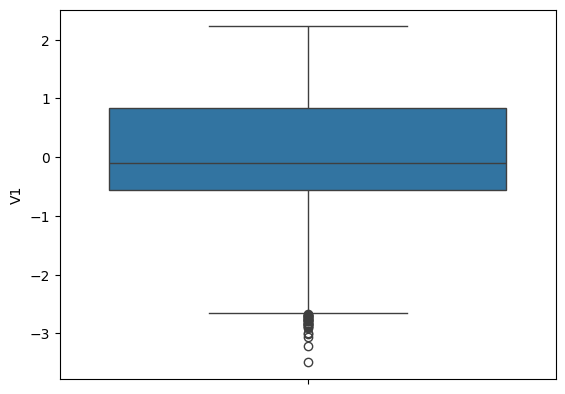

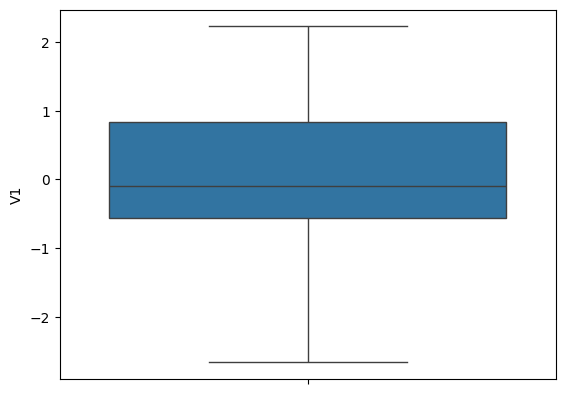

In [11]:
treat_outlair('V1',dataset)


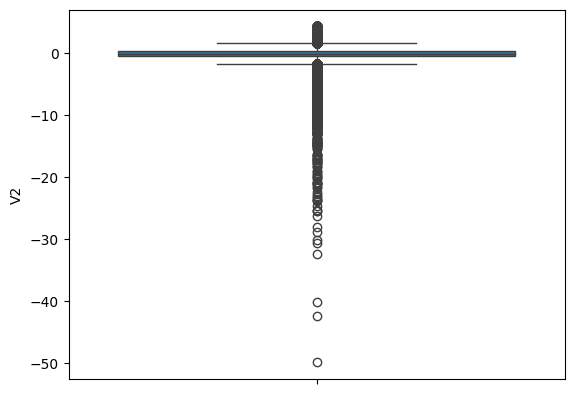

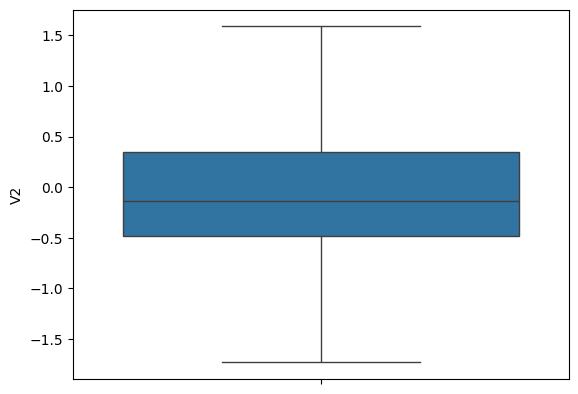

In [12]:
treat_outlair('V2',dataset)

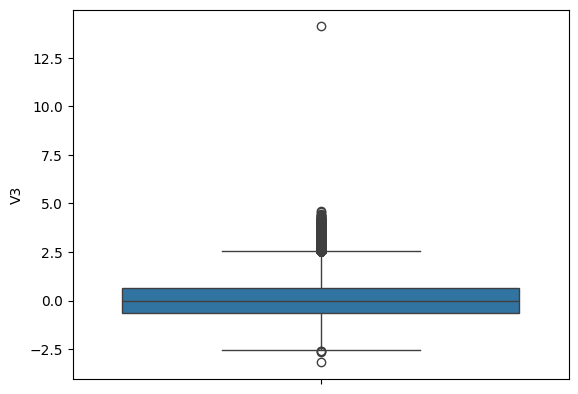

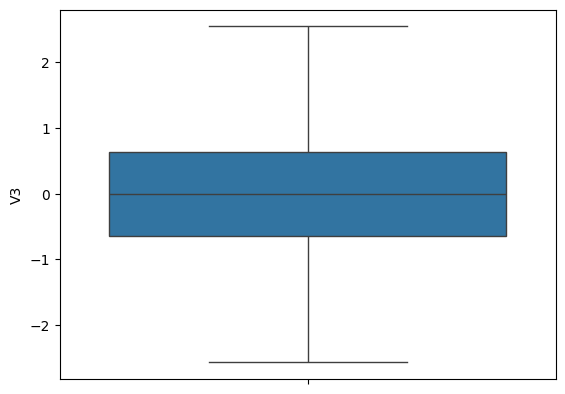

In [13]:
treat_outlair('V3',dataset)

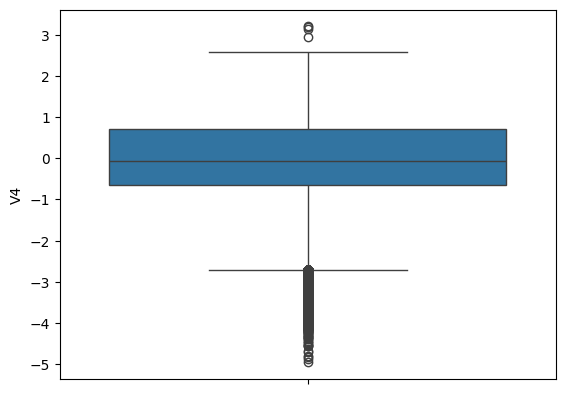

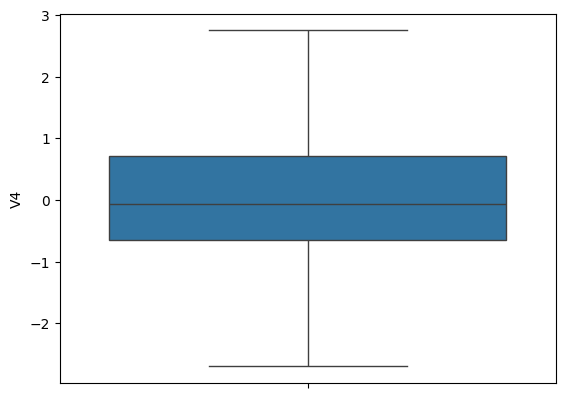

In [14]:
treat_outlair('V4',dataset)

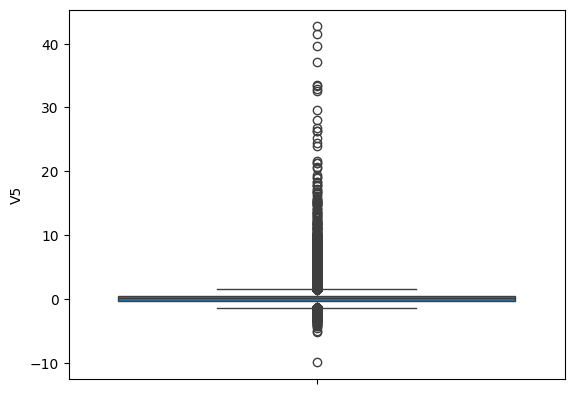

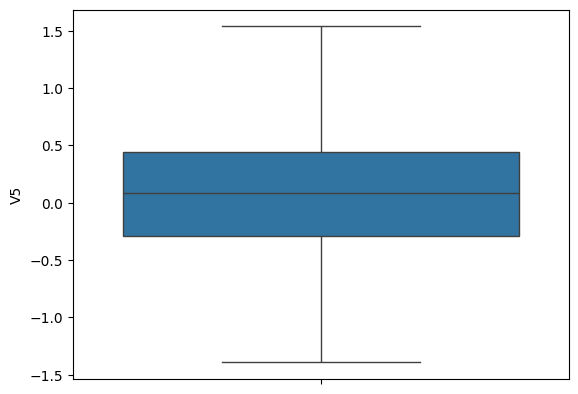

In [15]:
treat_outlair('V5',dataset)

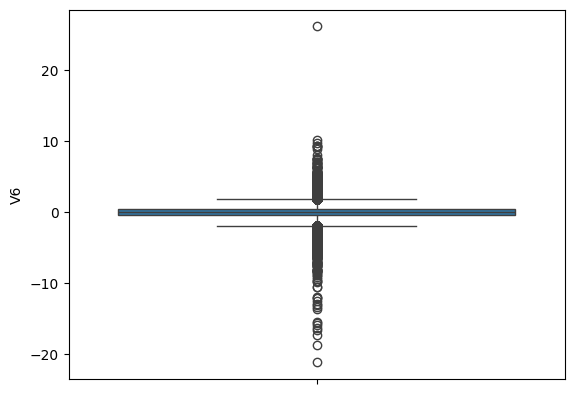

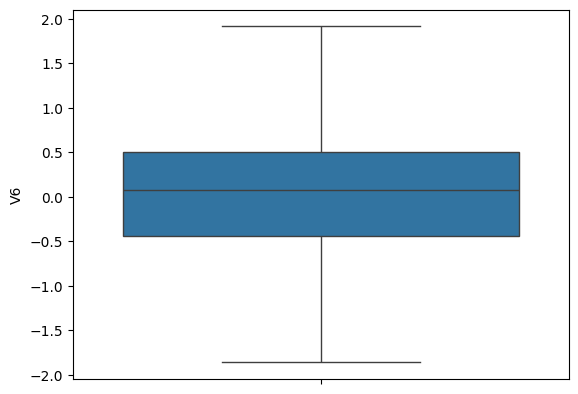

In [16]:
treat_outlair('V6',dataset)

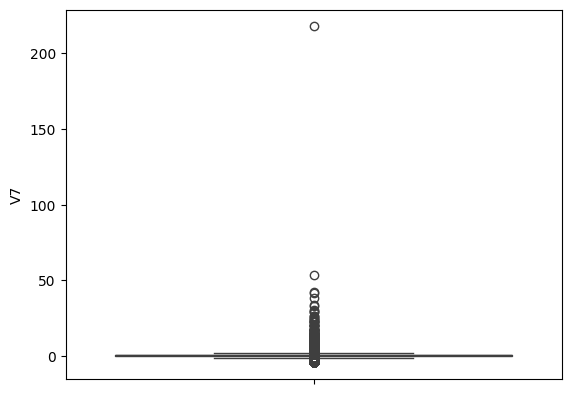

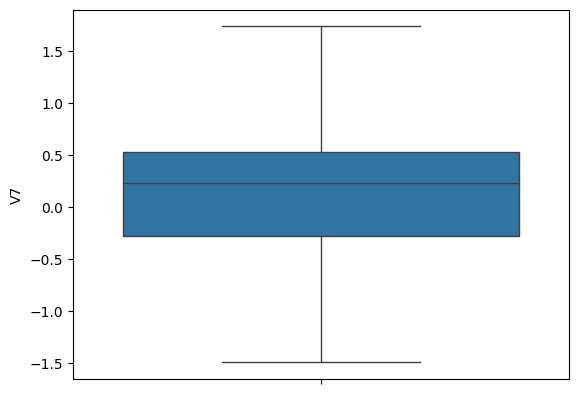

In [17]:
treat_outlair('V7',dataset)

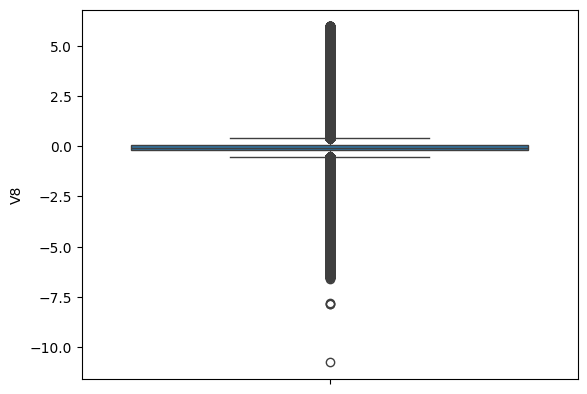

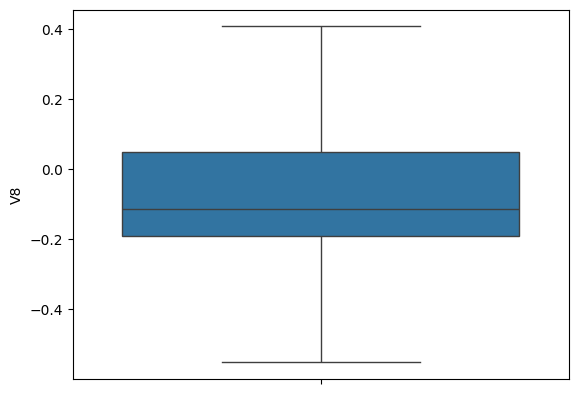

In [18]:
treat_outlair('V8',dataset)

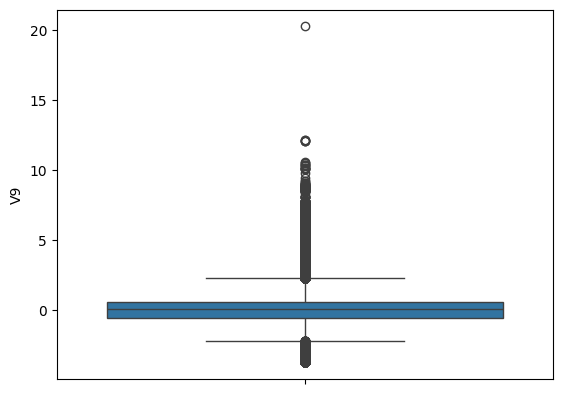

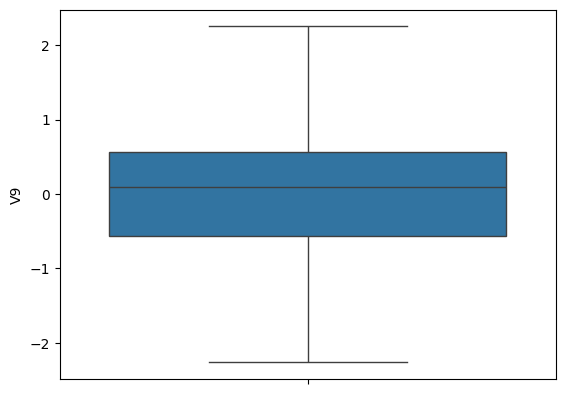

In [19]:
treat_outlair('V9',dataset)

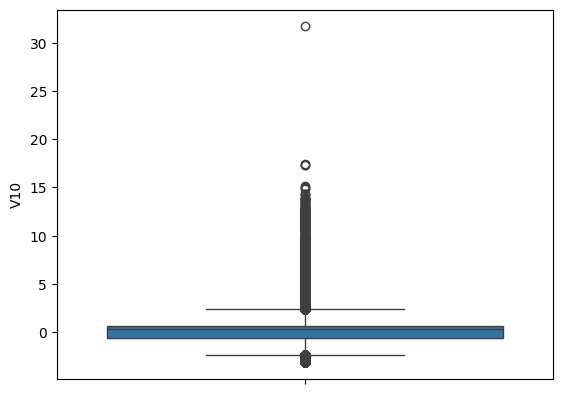

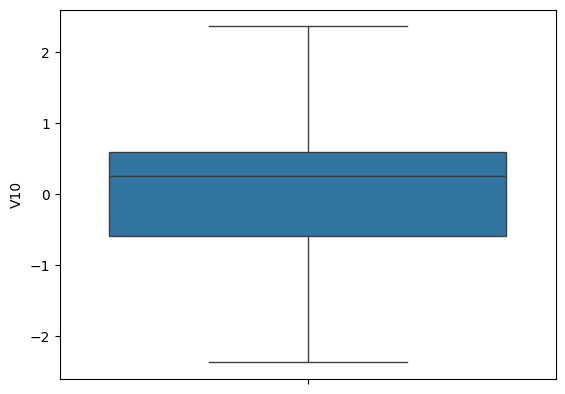

In [20]:
treat_outlair('V10',dataset)

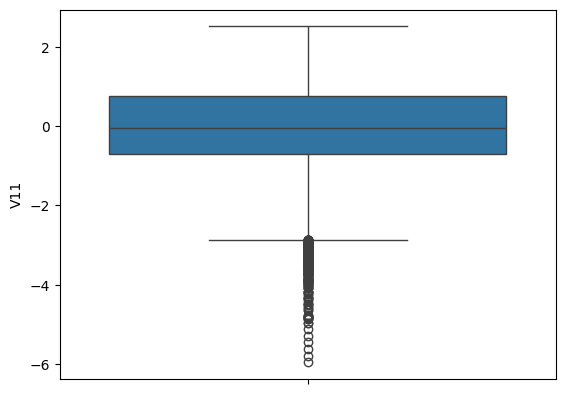

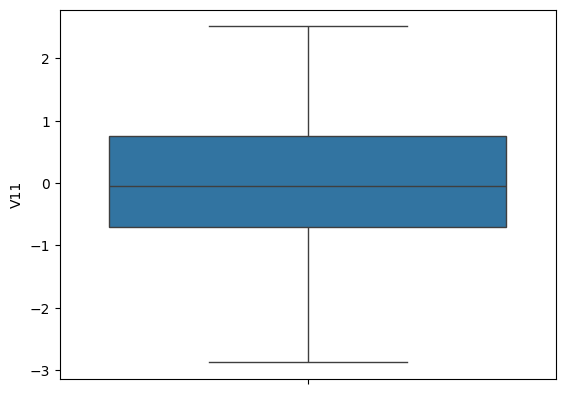

In [21]:
treat_outlair('V11',dataset)

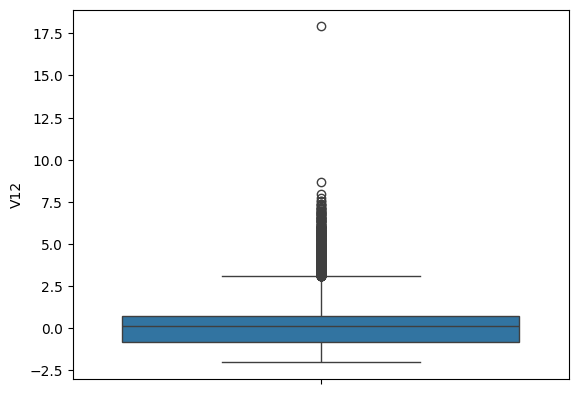

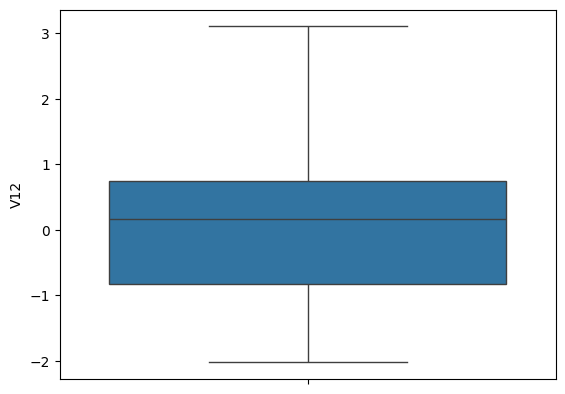

In [22]:
treat_outlair('V12',dataset)

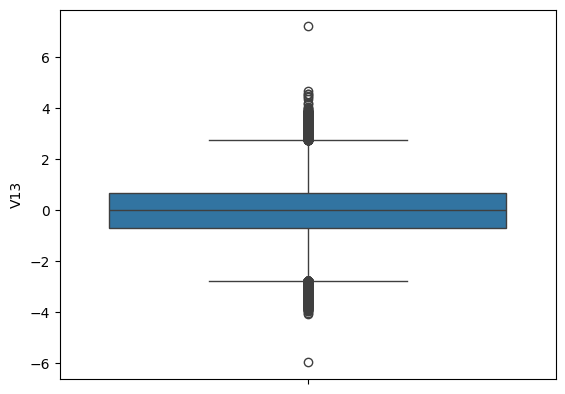

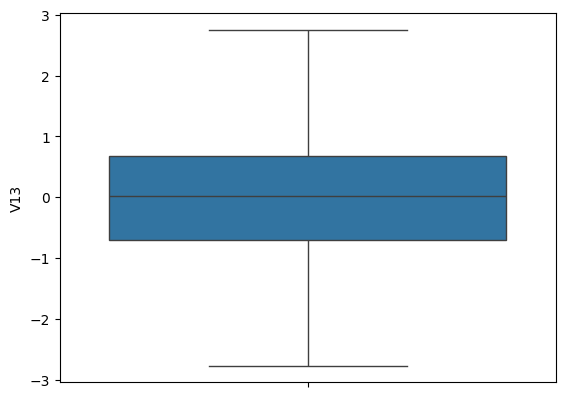

In [23]:
treat_outlair('V13',dataset)

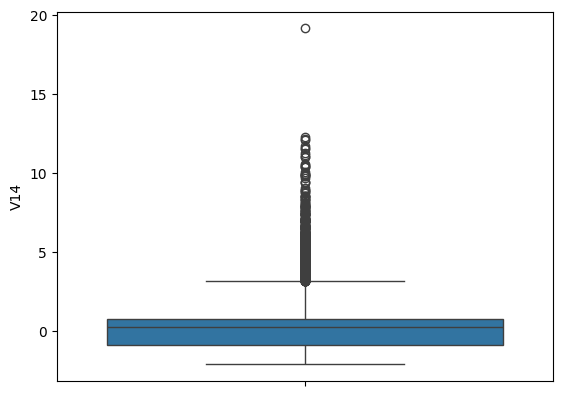

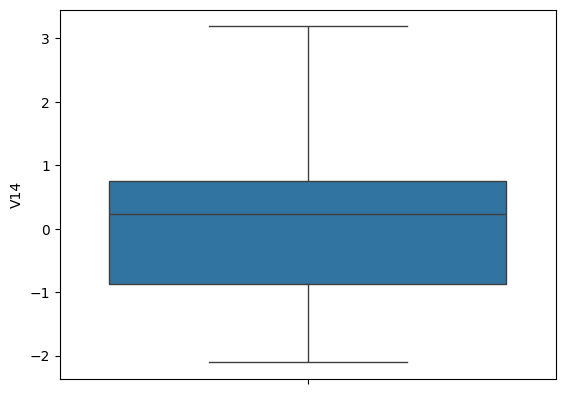

In [24]:
treat_outlair('V14',dataset)

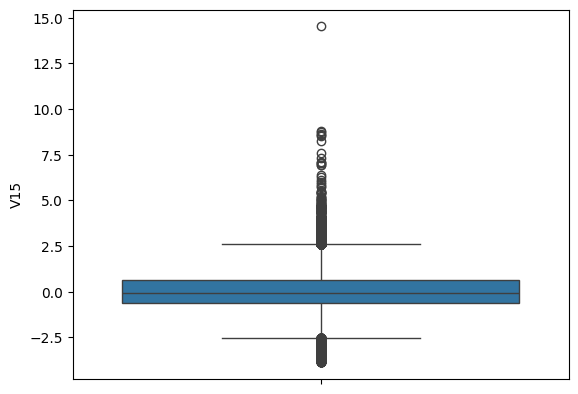

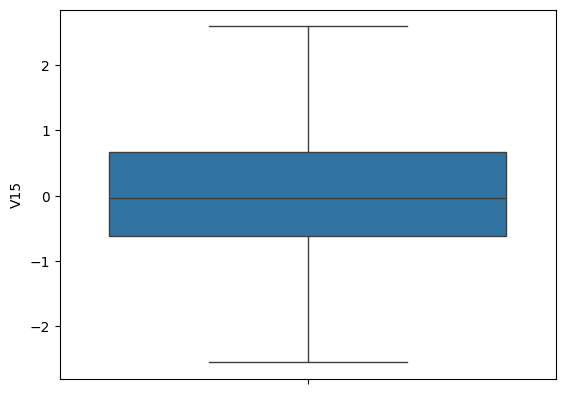

In [25]:
treat_outlair('V15',dataset)

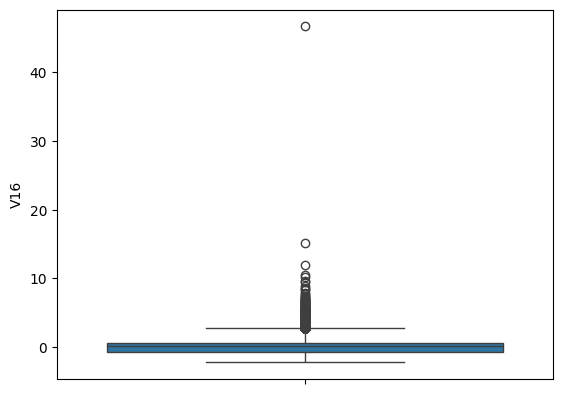

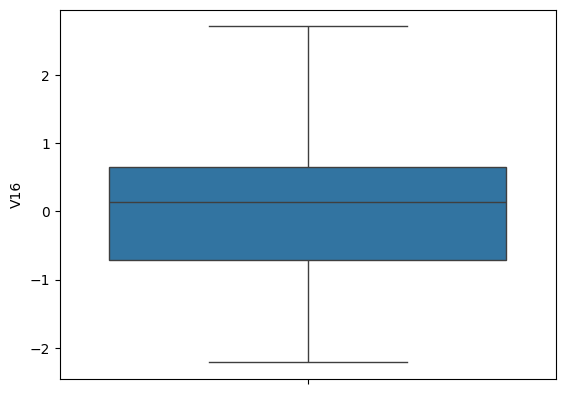

In [26]:
treat_outlair('V16',dataset)

In [27]:
dataset.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

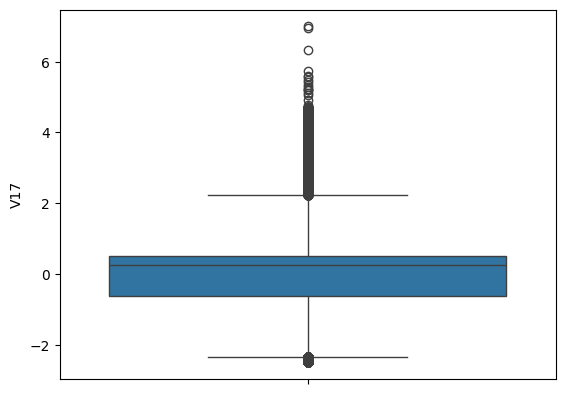

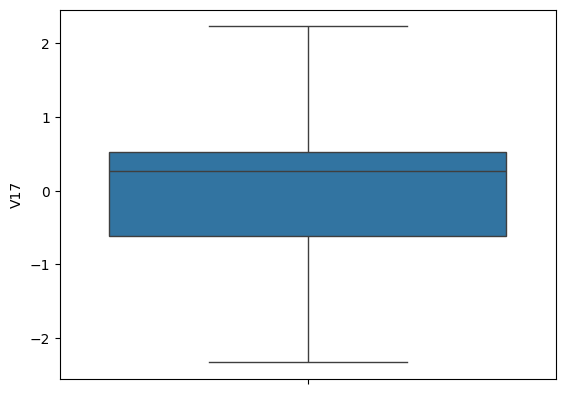

In [28]:
treat_outlair('V17',dataset)

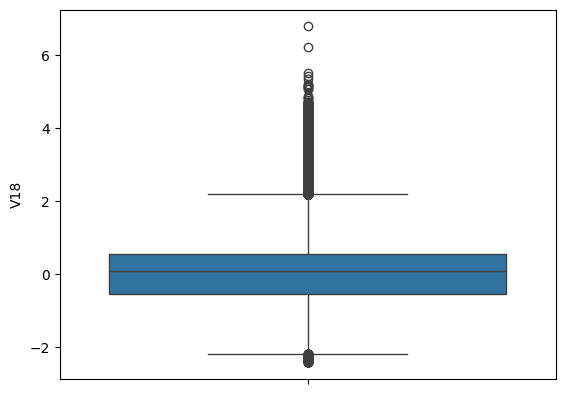

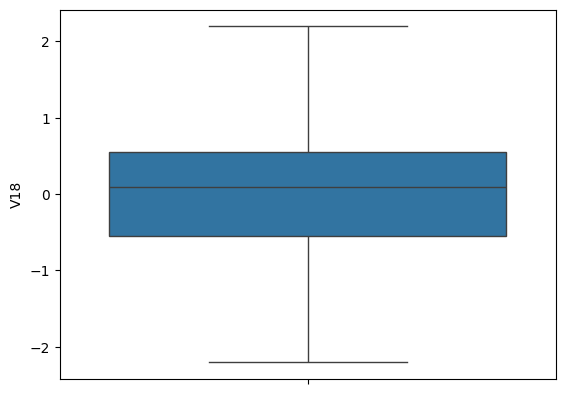

In [29]:
treat_outlair('V18',dataset)

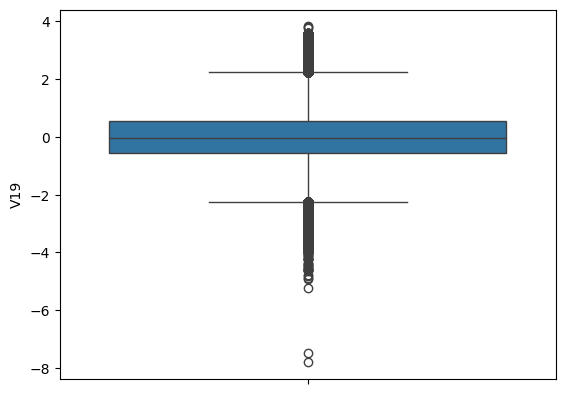

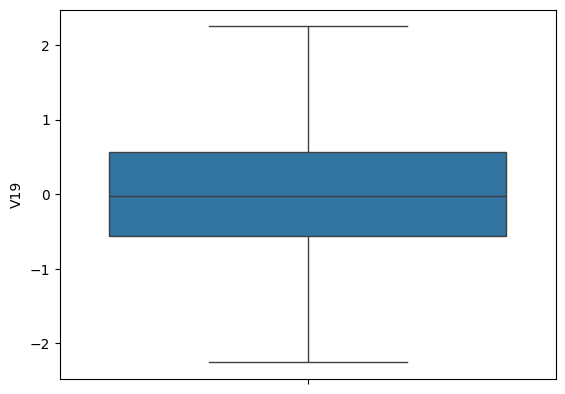

In [30]:
treat_outlair('V19',dataset)

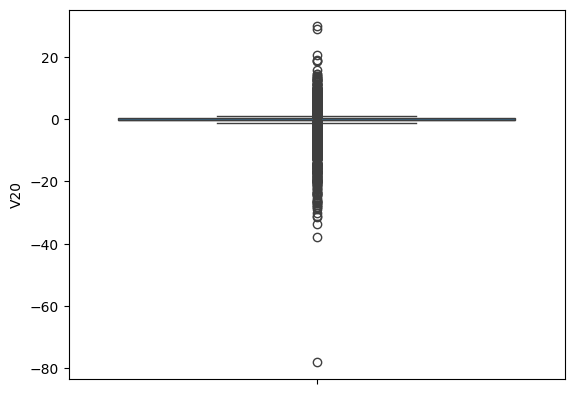

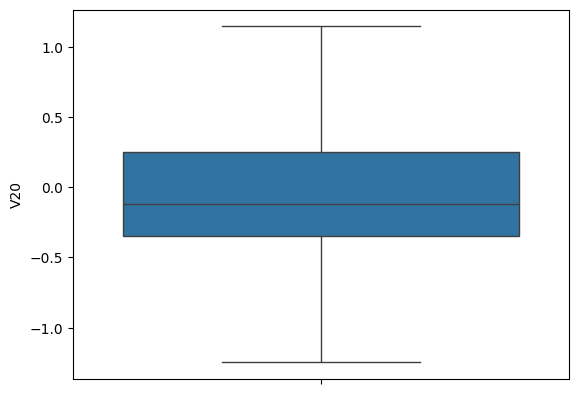

In [31]:
treat_outlair('V20',dataset)

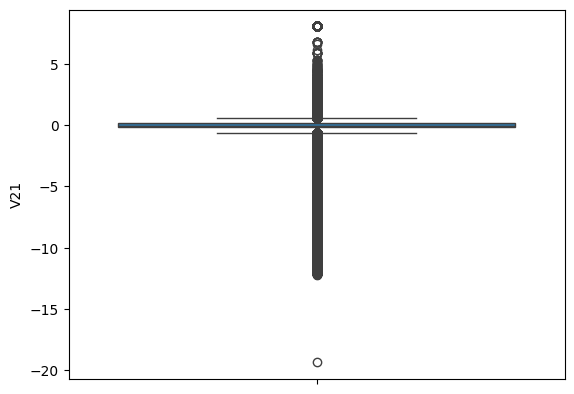

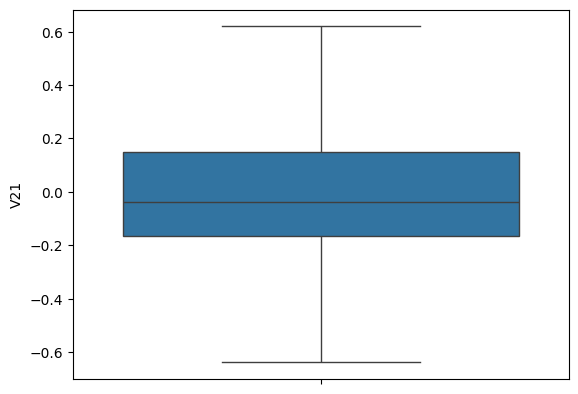

In [32]:
treat_outlair('V21',dataset)

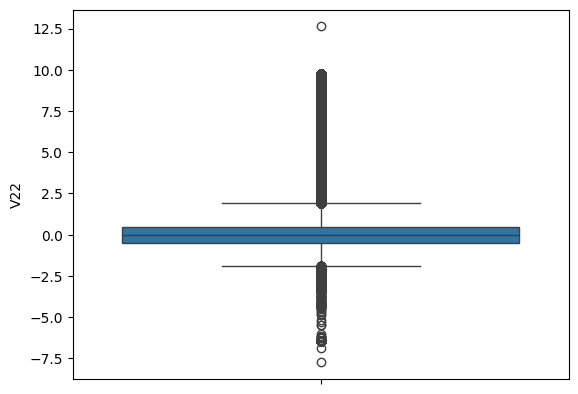

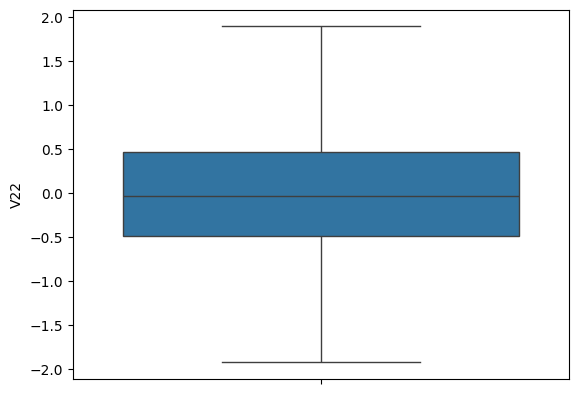

In [33]:
treat_outlair('V22',dataset)

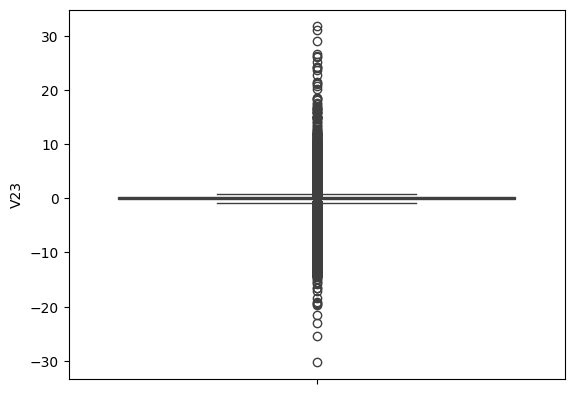

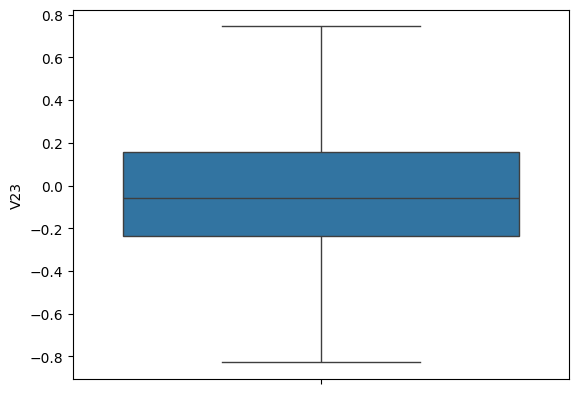

In [34]:
treat_outlair('V23',dataset)

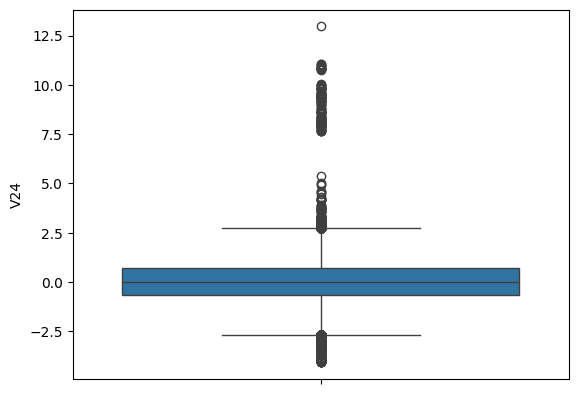

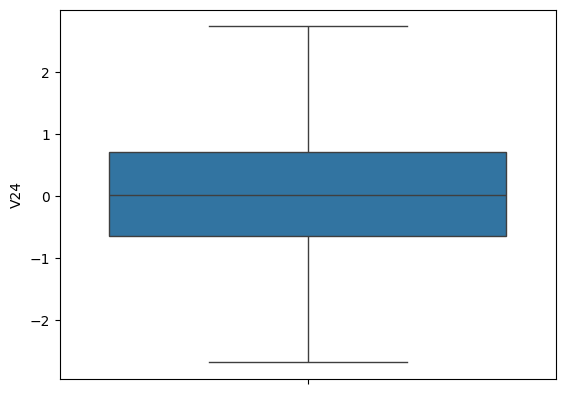

In [35]:
treat_outlair('V24',dataset)

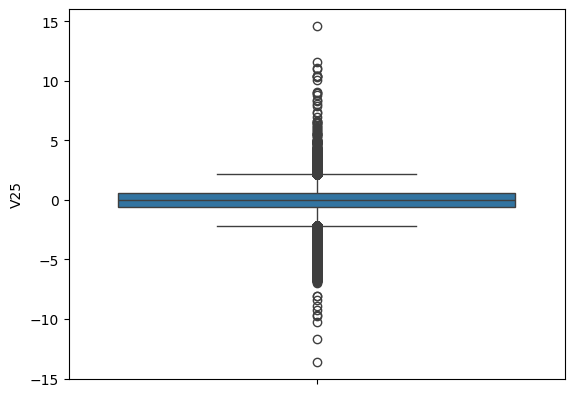

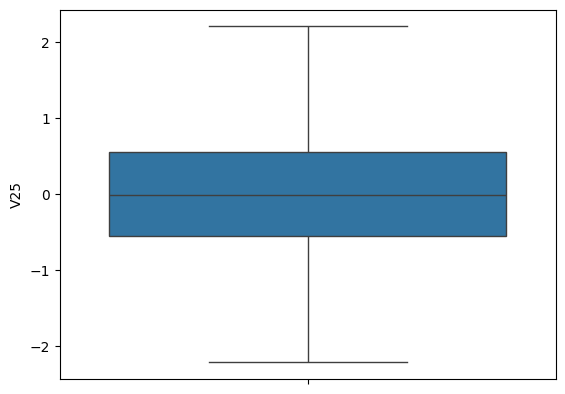

In [36]:
treat_outlair('V25',dataset)

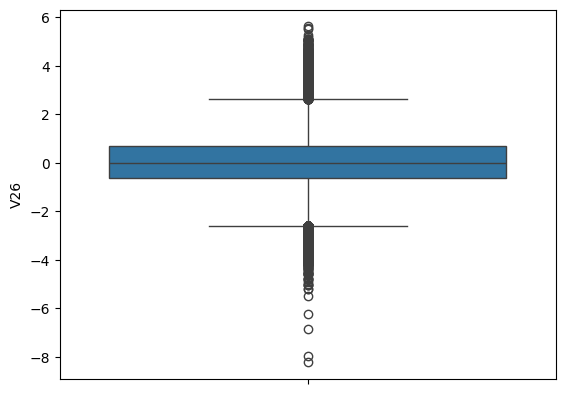

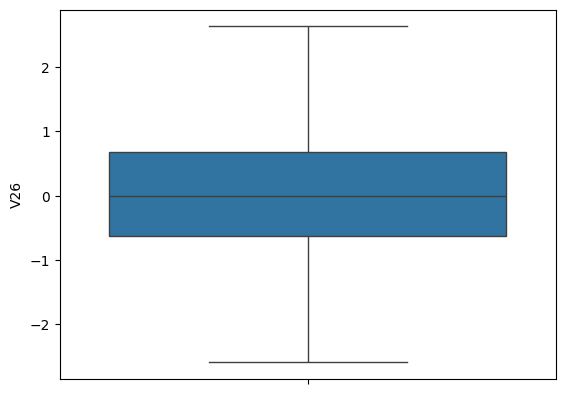

In [37]:
treat_outlair('V26',dataset)

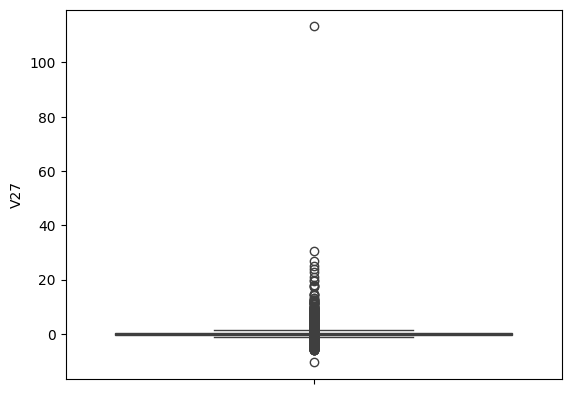

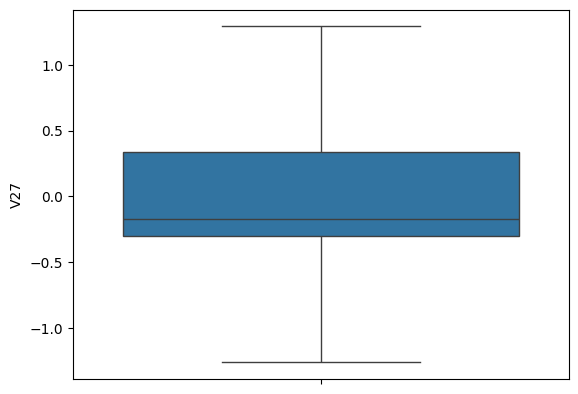

In [38]:
treat_outlair('V27',dataset)

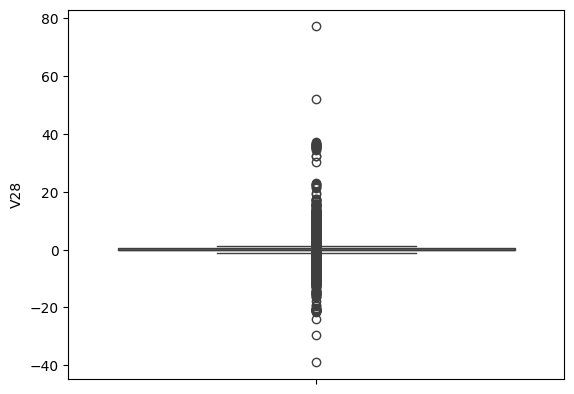

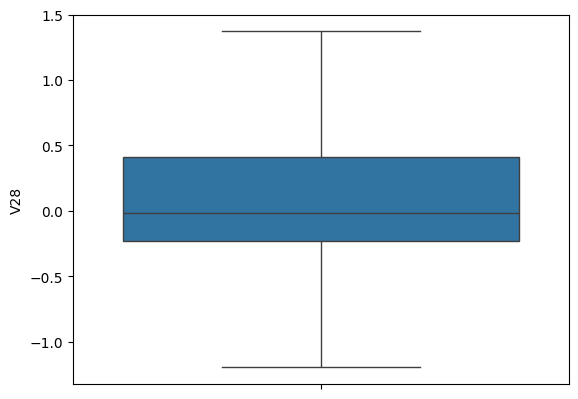

In [39]:
treat_outlair('V28',dataset)

## Feature Scaling

In [40]:
dataset.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.745732,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [41]:

dataset.drop(columns='id',inplace=True) # Removing ID since it has no actual use 
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.745732,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [42]:
_features = dataset.drop(columns=['Class'])
_target = dataset['Class']



In [43]:
scaler=MinMaxScaler()

_scaled_features = scaler.fit_transform(_features)
_scaled_features = pd.DataFrame(_scaled_features,columns=_features.columns)#converting to dataframe

dataset = pd.concat([_scaled_features,_target],axis=1) # Scaled Dataset
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.490990,0.380128,0.990408,0.479968,0.519285,0.687287,0.622856,0.439965,0.662211,0.634571,...,0.419438,0.560487,0.440359,0.526137,0.529060,0.412759,0.462534,0.406503,0.747484,0
1,0.745679,0.414336,0.611211,0.416519,0.569562,0.606671,0.588097,0.436717,0.578057,0.611755,...,0.352343,0.344804,0.576540,0.388714,0.543507,0.552884,0.397265,0.440228,0.270170,0
2,0.491067,0.235670,0.840207,0.411323,0.500321,0.869181,0.692189,0.475896,0.443140,0.645770,...,0.503348,0.687613,1.000000,0.281996,0.363359,0.436121,0.376840,0.369996,0.102690,0
3,0.513172,0.368291,0.843788,0.295369,0.560133,0.796016,0.622626,0.507670,0.455462,0.621358,...,0.390516,0.493475,0.389987,0.145477,0.727781,0.397215,0.429635,0.484242,0.222361,0
4,0.501995,0.471779,0.800788,0.413100,0.511253,0.633679,0.666043,0.353708,0.733745,0.704401,...,0.422275,0.694639,0.423280,0.553239,0.406706,0.701303,0.503592,0.628713,0.593122,0


## Imbalance Treatment


In [44]:
dataset['Class'].value_counts() # Perfectly Balanced Data 

Class
0    284315
1    284315
Name: count, dtype: int64

# Training Algorithms

## Naive Bayes

In [45]:
dataset.head()

x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

x.head()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [46]:
NB = GaussianNB()

# Training

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=0)

# Fitting
NB.fit(xtrain,ytrain)

# Predicting

ypred_NB = NB.predict(xtest)

In [47]:
print(classification_report(ytest,ypred_NB))
print('Accuracy Score For NB :',accuracy_score(ytest,ypred_NB))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     85172
           1       0.98      0.87      0.92     85417

    accuracy                           0.93    170589
   macro avg       0.93      0.93      0.93    170589
weighted avg       0.93      0.93      0.93    170589

Accuracy Score For NB : 0.9269882583284972


In [48]:
_models_DataFrame = pd.DataFrame(columns=['Model','Accuracy'])
def _Model_Analytics(Model,score):
    global _models_DataFrame
    _models_DataFrame = pd.concat([_models_DataFrame, pd.DataFrame({'Model': [Model], 'Accuracy': [score]})], ignore_index=True)
    print(_models_DataFrame)



In [49]:
_Model_Analytics('NB',accuracy_score(ytest,ypred_NB))
# warinign

  Model  Accuracy
0    NB  0.926988


## KNN classifier


In [50]:
KNN = KNeighborsClassifier(n_neighbors=6)
KNN.fit(xtrain,ytrain) # Fitting
ypred_KNN = KNN.predict(xtest)


In [51]:
_Model_Analytics('KNN',accuracy_score(ytest,ypred_KNN))

  Model  Accuracy
0    NB  0.926988
1   KNN  0.997368


## Decision Tree

In [52]:
DTC =  DecisionTreeClassifier(criterion='entropy',max_depth=11)
DTC.fit(xtrain,ytrain)
ypred_DTC = DTC.predict(xtest)

In [53]:
_Model_Analytics('DT',accuracy_score(ytest,ypred_DTC))

  Model  Accuracy
0    NB  0.926988
1   KNN  0.997368
2    DT  0.988000


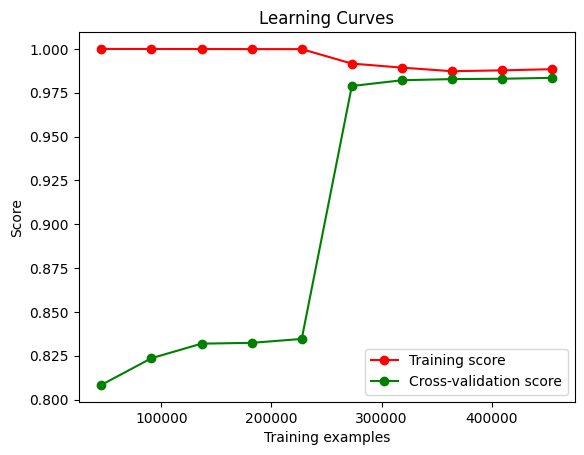

In [55]:
train_sizes, train_scores, test_scores = learning_curve(DTC, x, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.title('Learning Curves')
plt.show() 